## Importing pyplot method only from matplotlib

In [1]:
import matplotlib.pyplot as plt

In [2]:
xs = [10, 100, 25, 67, 74]
ys = [125, 26, 66, 1, 10]

## Scatter Plot

### Format
matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

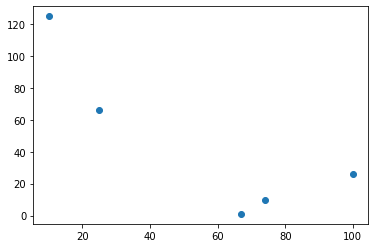

In [3]:
plt.scatter(xs, ys)
plt.show()

## Plotting data in a numpy array

In [4]:
import numpy as np
xys = [[10, 125], [100, 26], [26, 66], [67, 1], [74, 10]]
xys = np.array(xys)

print(xys)
print(xys[:,0])
print(xys[:,1])

[[ 10 125]
 [100  26]
 [ 26  66]
 [ 67   1]
 [ 74  10]]
[ 10 100  26  67  74]
[125  26  66   1  10]


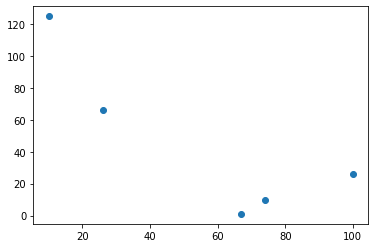

In [5]:
plt.scatter(xys[:,0], xys[:,1])
plt.show()

## Multidimensional Mean

np.mean(_data_, 0/1) <br>
0 calculates the mean by column and 1 calculates the mean by row

In [6]:
mean = np.mean(xys, 0)
mean = xys.mean(0)
print(mean)

[55.4 45.6]


## Adding graphical overlays

An ellipse patch shows the multidimensional standard deviation of a dataset

https://matplotlib.org/stable/api/patches_api.html

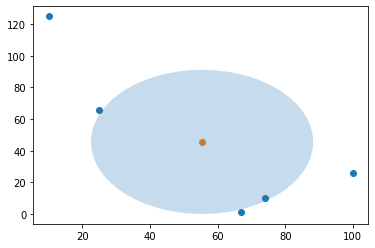

In [7]:
import matplotlib.patches as patches

mean = xys.mean(0)
std_dev = xys.std(0)

ellipse = patches.Ellipse([mean[0], mean[1]], std_dev[0]*2, std_dev[1]*2, alpha=0.25)

fig,graph = plt.subplots()

graph.scatter(xs, ys)
graph.scatter(mean[0], mean[1])
graph.add_patch(ellipse)
plt.show()

## Calculating distance to the mean

In [8]:
np.linalg.norm(xys[0]-mean)

91.46321665019222

## List Comprehension

In [9]:
mean_dists = [np.linalg.norm(i-mean) for i in xys]
print(mean_dists)

[91.46321665019222, 48.716732238523555, 35.78435412299627, 46.08383664583495, 40.16615490683668]


## Normalisation

In [10]:
x_min = np.min(xys[:,0])
x_max = np.max(xys[:,0])
print(x_min, x_max)

norm_x = (xys[:,0] - x_min) / (x_max - x_min)
print(norm_x)

10 100
[0.         1.         0.17777778 0.63333333 0.71111111]


In [11]:
xys_min = np.min(xys, 0)
xys_max = np.max(xys, 0)
print(x_min, x_max)

normed = (xys - xys_min) / (xys_max - xys_min)
print(normed)

10 100
[[0.         1.        ]
 [1.         0.2016129 ]
 [0.17777778 0.52419355]
 [0.63333333 0.        ]
 [0.71111111 0.07258065]]


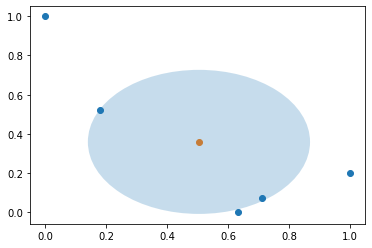

In [12]:
import matplotlib.patches as patches

mean = normed.mean(0)
std_dev = normed.std(0)

ellipse = patches.Ellipse([mean[0], mean[1]], std_dev[0]*2, std_dev[1]*2, alpha=0.25)

fig,graph = plt.subplots()

graph.scatter(normed[:,0], normed[:,1])
graph.scatter(mean[0], mean[1])
graph.add_patch(ellipse)
plt.show()

## Using pandas to read csv files

In [13]:
import pandas as pd

data = pd.read_csv("csv files/happyscore_income.csv")

print(data)

          country  adjusted_satisfaction  avg_satisfaction  std_satisfaction  \
0         Armenia                   37.0               4.9              2.42   
1          Angola                   26.0               4.3              3.19   
2       Argentina                   60.0               7.1              1.91   
3         Austria                   59.0               7.2              2.11   
4       Australia                   65.0               7.6              1.80   
..            ...                    ...               ...               ...   
106       Uruguay                   58.0               7.0              2.13   
107       Vietnam                   53.0               6.1              1.77   
108  South Africa                   49.0               6.3              2.47   
109        Zambia                   37.0               5.0              2.61   
110      Zimbabwe                   33.0               4.1              2.16   

     avg_income  median_income  income_

In [14]:
happy = data['happyScore']
income = data['avg_income']

print(happy, income)
happy.min(), happy.max()

0      4.350
1      4.033
2      6.574
3      7.200
4      7.284
       ...  
106    6.485
107    5.360
108    4.642
109    5.129
110    4.610
Name: happyScore, Length: 111, dtype: float64 0       2096.76
1       1448.88
2       7101.12
3      19457.04
4      19917.00
         ...   
106     7544.40
107     2231.40
108     3889.32
109      956.76
110     1768.56
Name: avg_income, Length: 111, dtype: float64


(2.839, 7.587000000000001)

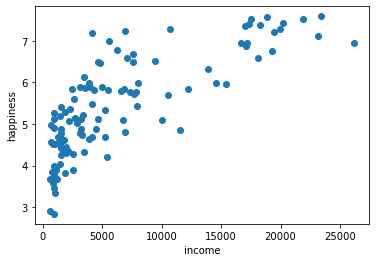

In [15]:
import matplotlib.pyplot as plt

plt.xlabel('income')
plt.ylabel('happiness')
plt.scatter(income, happy)
plt.show()

In [16]:
data

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia
...,...,...,...,...,...,...,...,...,...,...,...
106,Uruguay,58.0,7.0,2.13,7544.40,5269.226667,45.014444,'Latin America and Caribbean',6.485,1.06166,Uruguay
107,Vietnam,53.0,6.1,1.77,2231.40,1643.580000,39.242500,'Southeastern Asia',5.360,0.63216,Vietnam
108,South Africa,49.0,6.3,2.47,3889.32,1506.400000,63.726667,'Sub-Saharan Africa',4.642,0.92049,South Africa
109,Zambia,37.0,5.0,2.61,956.76,510.060000,55.120000,'Sub-Saharan Africa',5.129,0.47038,Zambia


## Sorting Data

In [17]:
data.sort_values('avg_income', inplace=True)
data

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
10,Burundi,25.0,2.9,1.96,572.880,436.92,33.360000,'Sub-Saharan Africa',2.905,0.01530,Burundi
65,Madagascar,33.0,3.7,1.86,574.200,415.48,40.720000,'Sub-Saharan Africa',3.681,0.20824,Madagascar
58,Liberia,37.0,4.4,2.02,653.040,528.72,36.480000,'Sub-Saharan Africa',4.571,0.07120,Liberia
72,Mozambique,34.0,3.8,1.76,714.720,488.52,45.580000,'Sub-Saharan Africa',4.971,0.08308,Mozambique
73,Niger,34.0,3.8,1.75,718.400,535.56,37.726667,'Sub-Saharan Africa',3.845,0.06940,Niger
...,...,...,...,...,...,...,...,...,...,...,...
16,Canada,69.0,8.0,1.71,20190.780,16829.10,33.790000,'North America',7.427,1.32629,Canada
77,Norway,70.0,8.0,1.62,21877.710,19477.62,27.307500,'Western Europe',7.522,1.45900,Norway
105,United States,62.0,7.3,1.92,23127.000,17925.36,41.090000,'North America',7.119,1.39451,United States
17,Switzerland,70.0,8.0,1.62,23400.040,19442.92,32.930000,'Western Europe',7.587,1.39651,Switzerland


## Applying filters to the data

In [18]:
richest = data[data['avg_income']>15000]
richest

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
49,Italy,57.0,6.6,1.81,15437.595000,13163.070000,34.126250,'Western Europe',5.948,1.25114,Italy
44,Ireland,64.0,7.5,1.85,16657.770000,13823.160000,32.418750,'Western Europe',6.940,1.33596,Ireland
90,Sweden,67.0,7.8,1.72,17032.755000,15166.605000,26.950000,'Western Europe',7.364,1.33171,Sweden
36,United Kingdom,60.0,7.1,1.98,17099.550000,14172.735000,34.432500,'Western Europe',6.867,1.26637,United Kingdom
7,Belgium,63.0,7.2,1.72,17168.505000,15166.455000,28.745000,'Western Europe',6.937,1.30782,Belgium
33,Finland,70.0,7.9,1.53,17310.195000,14962.560000,27.723750,'Western Europe',7.406,1.29025,Finland
27,Denmark,74.0,8.4,1.53,17496.510000,15630.885000,28.155000,'Western Europe',7.527,1.32548,Denmark
34,France,52.0,6.4,2.15,18096.788571,14971.251429,32.255714,'Western Europe',6.575,1.27778,France
76,Netherlands,69.0,7.6,1.38,18234.435000,15880.545000,29.271250,'Western Europe',7.378,1.32944,Netherlands
48,Iceland,71.0,8.1,1.64,18828.345000,16179.315000,28.780000,'Western Europe',7.561,1.30232,Iceland


## Identifying specific rows in a dataset

In [20]:
richest.iloc[-6:-1]

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
4,Australia,65.0,7.6,1.80,19917.00,15846.06,35.2850,'Australia and New Zealand',7.284,1.33358,Australia
16,Canada,69.0,8.0,1.71,20190.78,16829.10,33.7900,'North America',7.427,1.32629,Canada
77,Norway,70.0,8.0,1.62,21877.71,19477.62,27.3075,'Western Europe',7.522,1.45900,Norway
105,United States,62.0,7.3,1.92,23127.00,17925.36,41.0900,'North America',7.119,1.39451,United States
17,Switzerland,70.0,8.0,1.62,23400.04,19442.92,32.9300,'Western Europe',7.587,1.39651,Switzerland


In [21]:
import numpy as np

rich_mean = np.mean(richest["avg_income"])
all_mean = np.mean(data["avg_income"])

print(rich_mean, all_mean)

19266.680753968256 6442.751416214639


## Labelling graphs

Text(15437.595, 5.948, 'Italy')

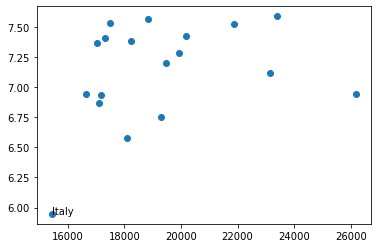

In [23]:
plt.scatter(richest["avg_income"], richest["happyScore"])
plt.text(richest.iloc[0]["avg_income"],
         richest.iloc[0]["happyScore"],
         richest.iloc[0]["country"])

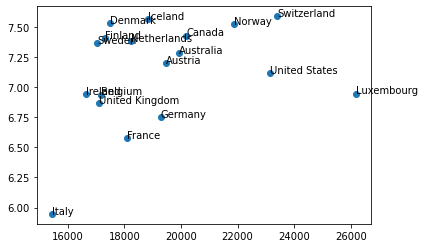

In [24]:
plt.scatter(richest["avg_income"], richest["happyScore"])

for k,row in richest.iterrows():
    plt.text(row["avg_income"],
             row["happyScore"],
             row["country"])

## 3D Graphs

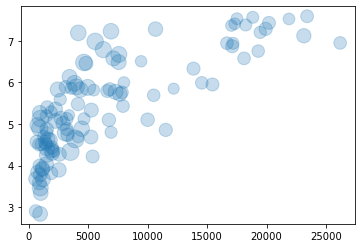

In [27]:
happy = data['happyScore']
income = data['avg_income']
ineq = data["income_inequality"]

plt.scatter(income, happy, s=ineq*5, alpha=0.25)

## KMeans

In [28]:
from sklearn.cluster import KMeans
import numpy as np

income_happy = np.column_stack((income,happy))
print(income_happy)

[[5.72880000e+02 2.90500000e+00]
 [5.74200000e+02 3.68100000e+00]
 [6.53040000e+02 4.57100000e+00]
 [7.14720000e+02 4.97100000e+00]
 [7.18400000e+02 3.84500000e+00]
 [8.50080000e+02 4.50700000e+00]
 [8.70840000e+02 3.58700000e+00]
 [9.03300000e+02 3.99500000e+00]
 [9.08640000e+02 4.89800000e+00]
 [9.10320000e+02 5.26800000e+00]
 [9.36360000e+02 2.83900000e+00]
 [9.41400000e+02 3.78100000e+00]
 [9.46520000e+02 3.46500000e+00]
 [9.56760000e+02 5.12900000e+00]
 [9.89040000e+02 3.34000000e+00]
 [1.05072000e+03 4.51200000e+00]
 [1.12648000e+03 3.93100000e+00]
 [1.13508000e+03 3.90400000e+00]
 [1.17768000e+03 3.66700000e+00]
 [1.26534000e+03 4.69400000e+00]
 [1.35784800e+03 4.56500000e+00]
 [1.42812000e+03 4.51400000e+00]
 [1.44888000e+03 4.03300000e+00]
 [1.46385600e+03 5.19400000e+00]
 [1.49052000e+03 4.25200000e+00]
 [1.49172000e+03 4.87600000e+00]
 [1.49268000e+03 4.41900000e+00]
 [1.49703000e+03 4.78600000e+00]
 [1.54174737e+03 5.39900000e+00]
 [1.57704000e+03 4.63300000e+00]
 [1.768560

In [29]:
km = KMeans(n_clusters=3).fit(income_happy)
km.cluster_centers_

array([[7.57755711e+03, 5.85080769e+00],
       [1.87593022e+04, 7.03270000e+00],
       [2.19912121e+03, 4.75472308e+00]])

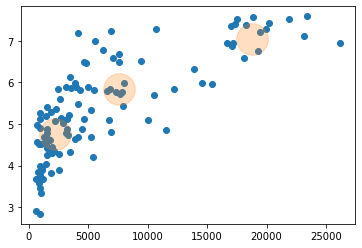

In [33]:
clusters = km.cluster_centers_

plt.scatter(income,happy)
plt.scatter(clusters[:,0], clusters[:,1], s=1000, alpha=0.25)
plt.show()